**Proyek: Menganalisis Bias Sampling**

**Tujuan:**
**untuk melihat secara langsung efek dari metode sampling yang berbeda.**

----

**1. Muat Data dan Tentukan Populasi:**

- Impor library yang dibutuhkan: pandas, numpy, dan matplotlib.pyplot.
- Muat dataset Titanic: titanic = sns.load_dataset('titanic').
- Kita akan menganggap DataFrame titanic ini sebagai populasi kita. Fokus pada kolom 'age' (usia).
- Hitung parameter populasi: rata-rata usia sebenarnya dari semua penumpang. mean_age_pop = titanic['age'].mean(). Cetak hasilnya.

***import library dan muat dataset***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 


titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


***Anggap dataframe titanic adalah populasi dengan fokus ke variable age lalu hitung parameter populasi/rata-rata sebenarnya semua penumpang***

In [3]:
# mean_age_pop = np.mean(titanic['age'])
mean_age_pop = titanic['age'].mean()
mean_age_pop.round(2)

29.7

---

**2. Lakukan Simple Random Sampling:**

- Ambil sampel acak sebanyak 50 penumpang dari populasi: random_sample = titanic.sample(n=50, random_state=42). (Penggunaan random_state berfungsi sama seperti np.random.seed() untuk reproduktifitas).
- Hitung estimasi titik: rata-rata usia dari sampel acak Anda. mean_age_random = random_sample['age'].mean().
- Bandingkan hasilnya dengan rata-rata populasi. Apakah nilainya mendekati?

In [4]:
# do random sampling
rand_samp = titanic.sample(n=50, random_state=42)
# calculate mean age from random sampling
mean_age_rand = rand_samp['age'].mean()
mean_age_rand.round(2)

26.13

---

**3. Simulasikan Convenience Sampling:**
- Untuk menyimulasikan convenience sample, ambil saja 50 baris pertama dari dataset, yang mungkin saja diurutkan berdasarkan kriteria tertentu (misalnya, kelas penumpang). convenience_sample = titanic.head(50).
- Hitung estimasi titik dari sampel ini: mean_age_convenience = convenience_sample['age'].mean().
- Bandingkan hasilnya dengan rata-rata populasi. Apakah lebih dekat atau lebih jauh dibandingkan dengan hasil dari sampel acak?

In [5]:
# Convenience Sampling

# Select fifty rows of the dataset
conv_samp = titanic.head(50)
# Calculate mean age from convenience sampling
mean_age_conv = conv_samp['age'].mean()
mean_age_conv.round(2)



27.47

**4. Visualisasikan Distribusinya:**

- Buat tiga histogram terpisah untuk membandingkan distribusi usia dari:
    - Seluruh populasi (titanic['age'])
    - Sampel acak (random_sample['age'])
    - Sampel kemudahan (convenience_sample['age'])
- Gunakan plt.hist() dan plt.show() untuk setiap plot. Beri judul pada setiap plot agar jelas.

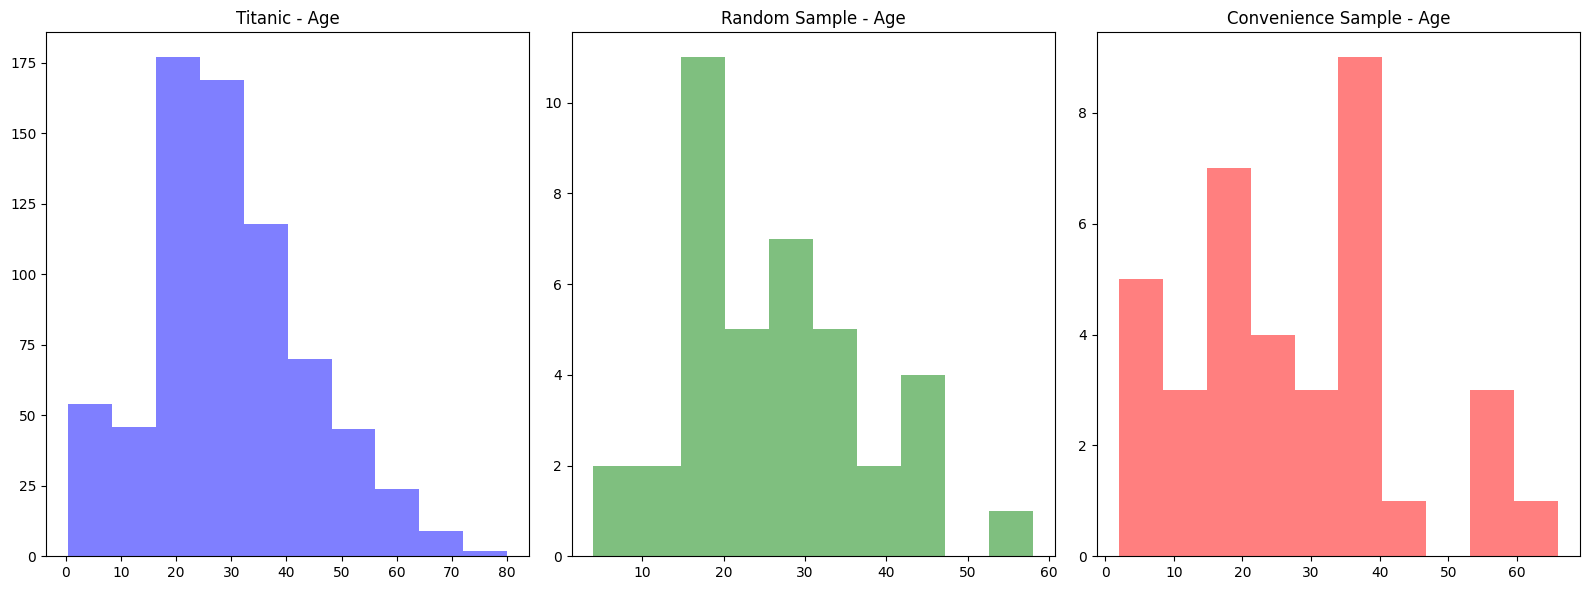

In [6]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(16,6))  # 1 row, 3 columns

# Subplot 1
axes[0].hist(titanic['age'], bins=10, color='blue', alpha=0.5)
axes[0].set_title("Titanic - Age")

# Subplot 2
axes[1].hist(rand_samp['age'], bins=10, color='green', alpha=0.5)
axes[1].set_title("Random Sample - Age")

# Subplot 3
axes[2].hist(conv_samp['age'], bins=10, color='red', alpha=0.5)
axes[2].set_title("Convenience Sample - Age")

plt.tight_layout()
plt.show()

Average age of population: 29.7
Average age of random sampling: 26.13
Average age of convenience sampling with first 50 rows : 27.47


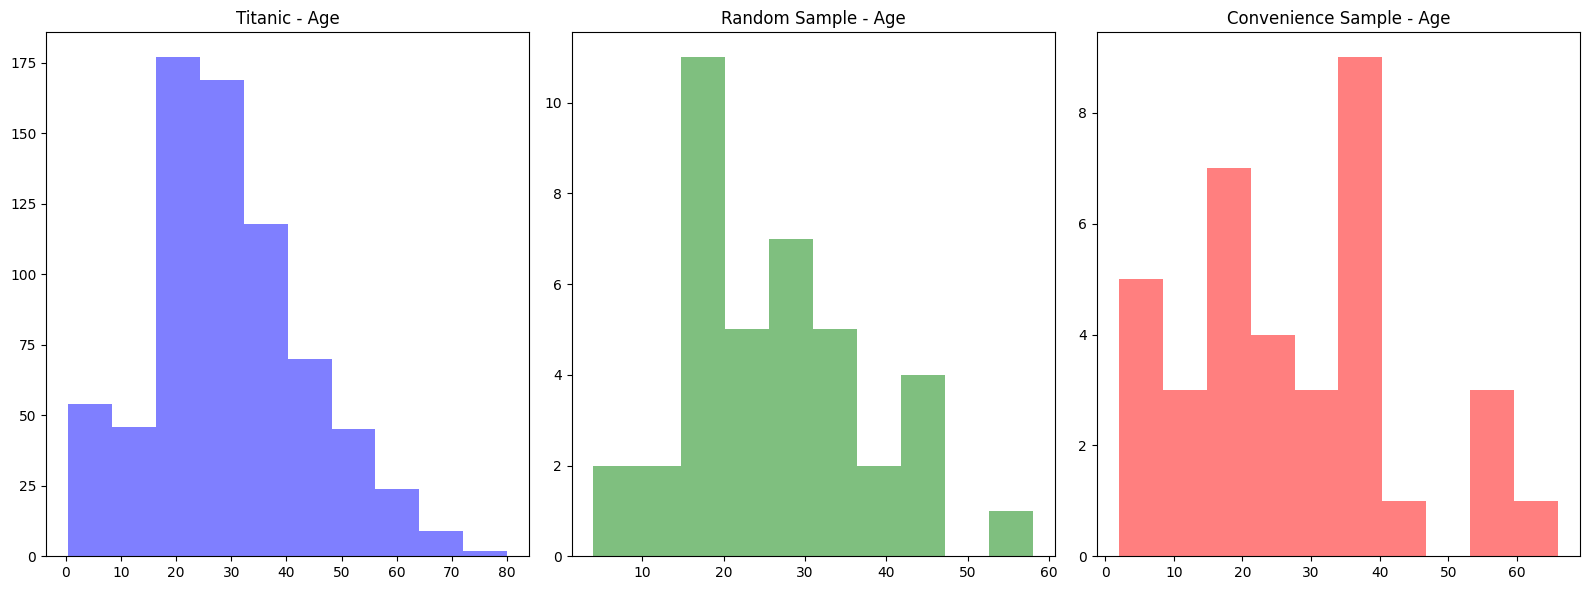

In [7]:
# mean_age_pop = np.mean(titanic['age'])
mean_age_pop = titanic['age'].mean()
print('Average age of population:', mean_age_pop.round(2))

# do random sampling
rand_samp = titanic.sample(n=50, random_state=42)
# calculate mean age from random sampling
mean_age_rand = rand_samp['age'].mean()
print('Average age of random sampling:', mean_age_rand.round(2))

# Convenience Sampling
# Select fifty rows of the dataset
conv_samp = titanic.head(50)
# Calculate mean age from convenience sampling
mean_age_conv = conv_samp['age'].mean()
print('Average age of convenience sampling with first 50 rows :', mean_age_conv.round(2))



# vizualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16,6))  # 1 row, 3 columns

# Subplot 1
axes[0].hist(titanic['age'], bins=10, color='blue', alpha=0.5)
axes[0].set_title("Titanic - Age")
# Subplot 2
axes[1].hist(rand_samp['age'], bins=10, color='green', alpha=0.5)
axes[1].set_title("Random Sample - Age")
# Subplot 3
axes[2].hist(conv_samp['age'], bins=10, color='red', alpha=0.5)
axes[2].set_title("Convenience Sample - Age")

plt.tight_layout()
plt.show()


**Meskipun hasil estimasi rata-rata usia dari convenience sampling (27.47) secara numerik lebih dekat ke rata-rata populasi (29.7) dibandingkan simple random sampling (26.13), metode simple random sampling terbukti lebih unggul.**

**Alasannya ada dua:**

1. Representativitas Distribusi: Histogram dari sampel acak menunjukkan bentuk distribusi yang jauh lebih mirip dengan distribusi populasi. Ini berarti sampel acak berhasil menangkap keragaman usia yang ada di seluruh populasi, menjadikannya gambaran mini yang lebih akurat.

2. Proses yang Tidak Bias: Kedekatan nilai dari convenience sampling bersifat kebetulan dan tidak dapat diandalkan. Proses pengambilan 50 data pertama memiliki bias yang inheren. Sebaliknya, proses sampling acak secara statistik dijamin tidak bias dalam jangka panjang, menjadikannya metode yang dapat dipercaya untuk inferensi statistik."